# Gọi thư viện

In [28]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
import cv2

In [29]:
# đọc tên các lớp :  có 9 loại
DIR = 'D:\study-hk2\ML\ML\classification_fish\data\Fish_Dataset' 
classes = [i for i in os.listdir(DIR) if '.' not in i]                     
classes

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [30]:
# tạo mảng chứa các lớp và đường dẫn đến các file ảnh RGB và ko đọc các file ảnh GT
label = []
path = []

for dirname, _,filenames in os.walk(DIR):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':               # If filename contains .png
            if dirname.split()[-1]!='GT':                       # If directory doesn't contain GT
                label.append(os.path.split(dirname)[-1])         # Append the directory name to label 
                path.append(os.path.join(dirname,filename))     # Append all the png files to path of that directory

# Ready to create the df
df = pd.DataFrame(columns=['path','label'])
df['path']=path # đường dẫn đến ảnh các loại cá
df['label']=label 

In [31]:
# Xem kích thước của mỗi ảnh
PATH_1 = df['path'][0]
img = cv2.imread(PATH_1)
height, width, channels = img.shape
print('Chiều cao:', height)
print('Chiều rộng:', width)
print('Số kênh màu:', channels)

Chiều cao: 445
Chiều rộng: 590
Số kênh màu: 3


In [32]:
# Đếm số lượng mỗi label của mỗi loại:

df['label'].value_counts()

label
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64

In [33]:
# xem số nhãn của bài này
y = df['label'].unique()
y

array(['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel',
       'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp',
       'Striped Red Mullet', 'Trout'], dtype=object)

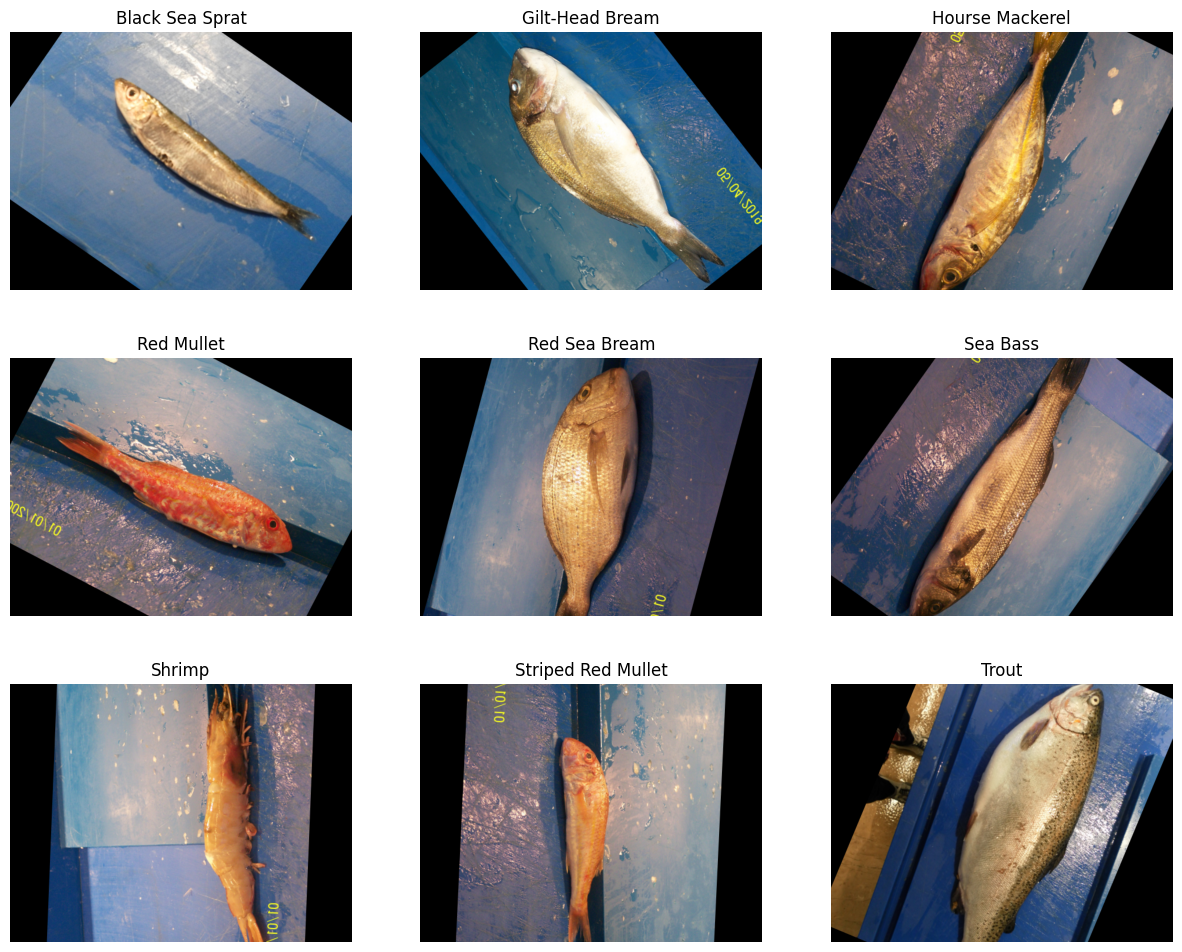

In [34]:
# xem ảnh RGB của 9 ảnh của các loại cá
idx = 0
plt.figure(figsize=(15,12))
for i in y:
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']==i].iloc[1,0]))
    plt.title(i)
    plt.axis('off')
    idx+=1

In [35]:
# chia dữ liệu thành train với val với tỷ lệ  8:2
train_df, val_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

- train_df là dataframe chứa thông tin về đường dẫn của các ảnh huấn luyện và nhãn tương ứng.
- x_col và y_col là tên của các cột trong train_df lưu đường dẫn ảnh và nhãn tương ứng.
- color_mode được chọn là grayscale để đọc ảnh đầu vào ở dạng màu xám.
-  class_mode được chọn là categorical để huấn luyện mô hình phân loại nhiều lớp.
-  batch_size là số lượng ảnh được đưa vào huấn luyện cùng lúc.

In [41]:
train_df.count() , val_df.count()

(path     7200
 label    7200
 dtype: int64,
 path     1800
 label    1800
 dtype: int64)

In [40]:
# Chuẩn hóa ảnh về trong dạng[0,1] và giảm kích thước về cỡ 250 * 250

train_generator =ImageDataGenerator(rescale=1./255)
val_generator = ImageDataGenerator(rescale=1./255)

# tạo ra 
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(250,250), color_mode="rgb", class_mode='categorical', batch_size=32)
val_images = val_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(250,250), color_mode="rgb", class_mode='categorical', batch_size=32)

Found 7200 validated image filenames belonging to 9 classes.
Found 7200 validated image filenames belonging to 9 classes.


In [42]:
# xác định label cho mỗi loại
display(train_images.class_indices)
display(val_images.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

d:\package\anaconda3\envs\hehe\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


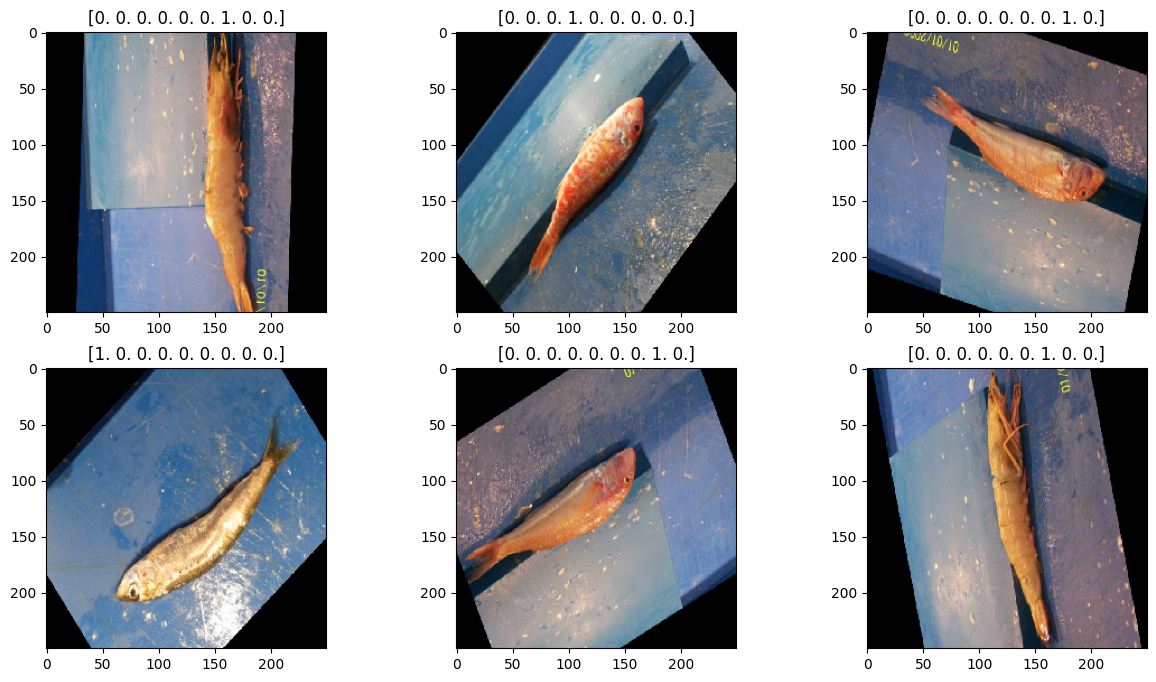

In [44]:
# hiển thị ảnh sau khi xử lý
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for i in range(6):
    img, label = val_images.next()
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    j=j+1
plt.show();

In [3]:
n = int(input())
k = int(input())
A = [int(i) for i in input().split()]
for i in A:
    if i % k == 0:
        A.remove(i)

print(A)

[1, 2, 3, 4]
